In [2]:
!pip install nltk pandas matplotlib


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Primeros 10 2-gramas:
[('The', 'Project'), ('Project', 'Gutenberg'), ('Gutenberg', 'EBook'), ('EBook', 'of'), ('of', 'The'), ('The', 'Adventures'), ('Adventures', 'of'), ('of', 'Sherlock'), ('Sherlock', 'Holmes'), ('Holmes', 'by')]


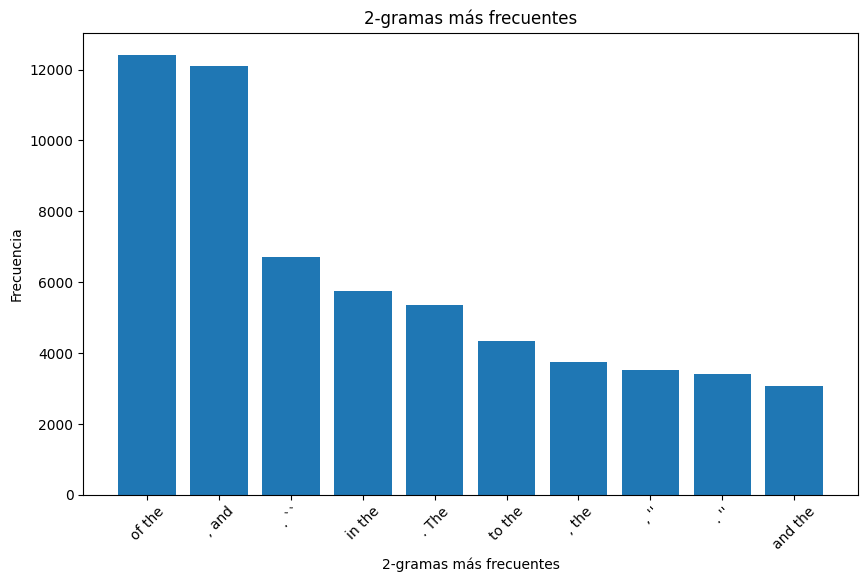

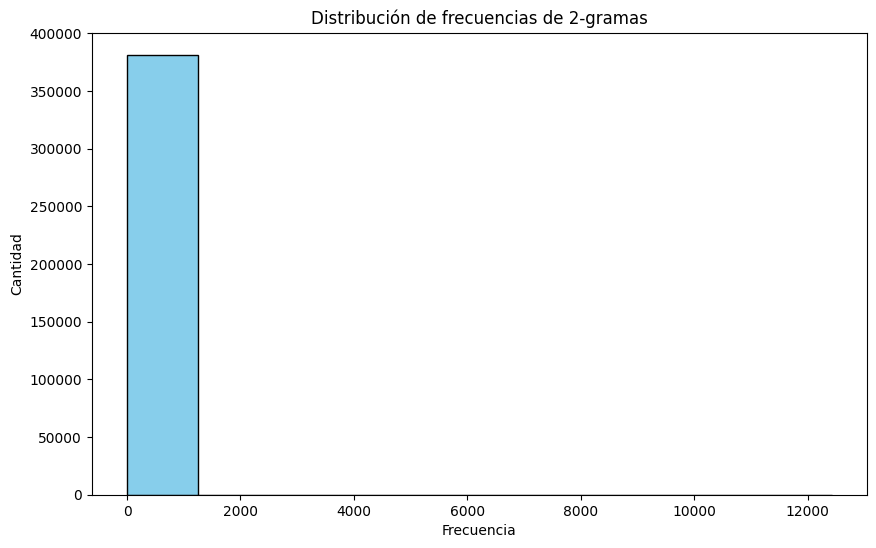

Primeros 10 3-gramas:
[('The', 'Project', 'Gutenberg'), ('Project', 'Gutenberg', 'EBook'), ('Gutenberg', 'EBook', 'of'), ('EBook', 'of', 'The'), ('of', 'The', 'Adventures'), ('The', 'Adventures', 'of'), ('Adventures', 'of', 'Sherlock'), ('of', 'Sherlock', 'Holmes'), ('Sherlock', 'Holmes', 'by'), ('Holmes', 'by', 'Sir')]


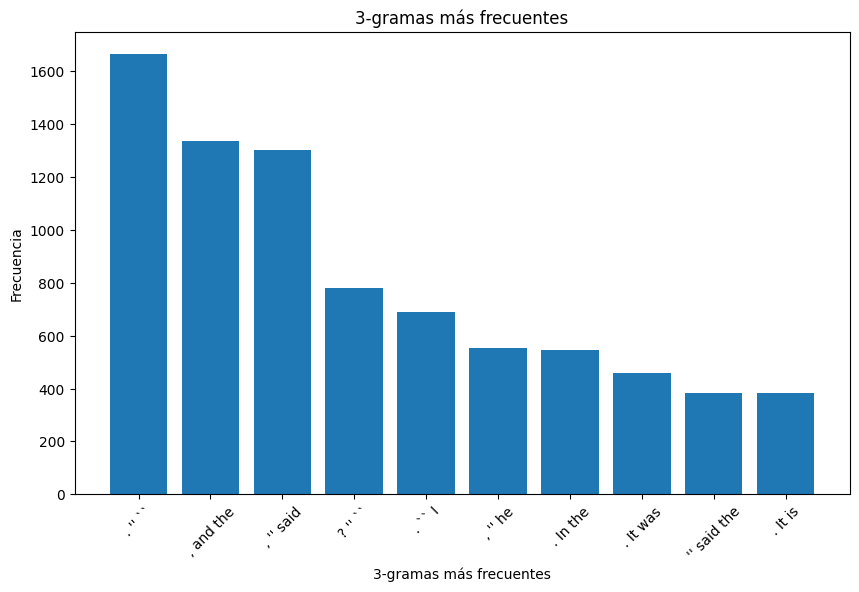

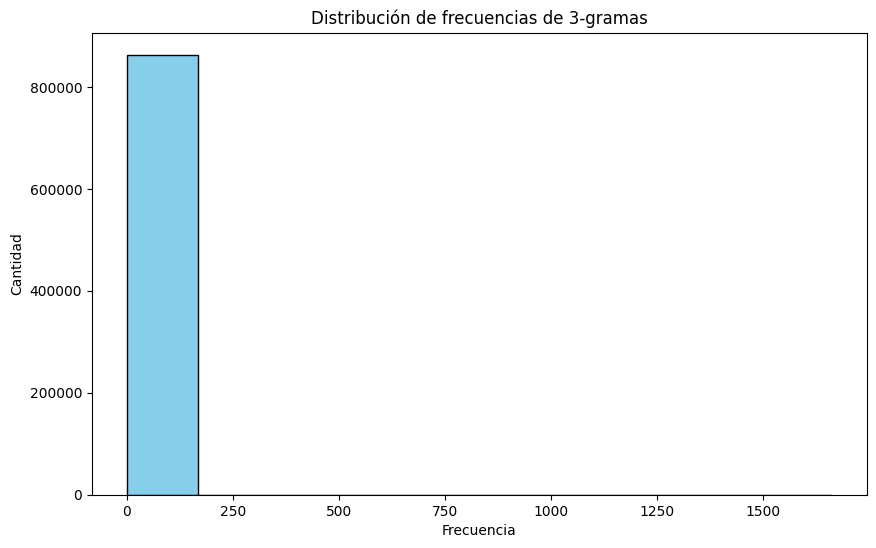

Primeros 10 4-gramas:
[('The', 'Project', 'Gutenberg', 'EBook'), ('Project', 'Gutenberg', 'EBook', 'of'), ('Gutenberg', 'EBook', 'of', 'The'), ('EBook', 'of', 'The', 'Adventures'), ('of', 'The', 'Adventures', 'of'), ('The', 'Adventures', 'of', 'Sherlock'), ('Adventures', 'of', 'Sherlock', 'Holmes'), ('of', 'Sherlock', 'Holmes', 'by'), ('Sherlock', 'Holmes', 'by', 'Sir'), ('Holmes', 'by', 'Sir', 'Arthur')]


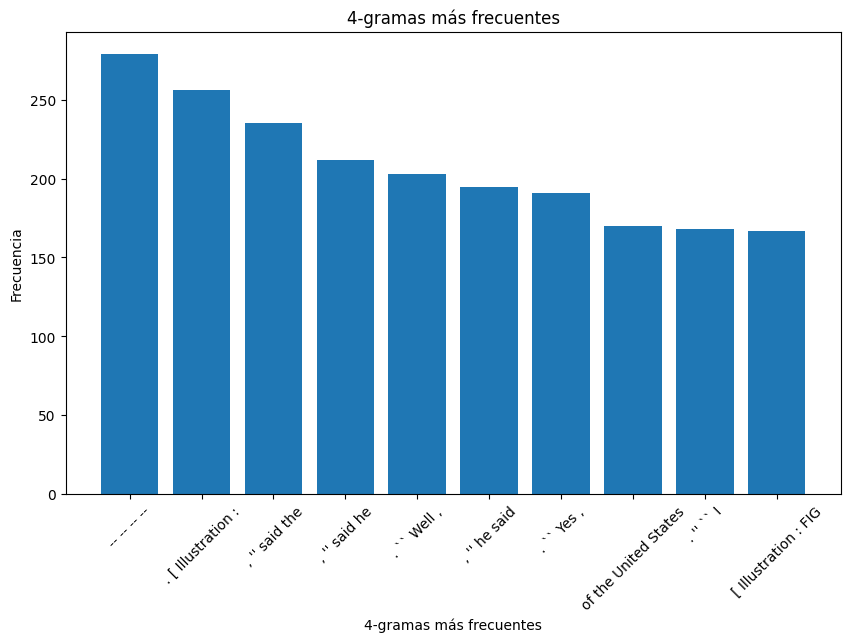

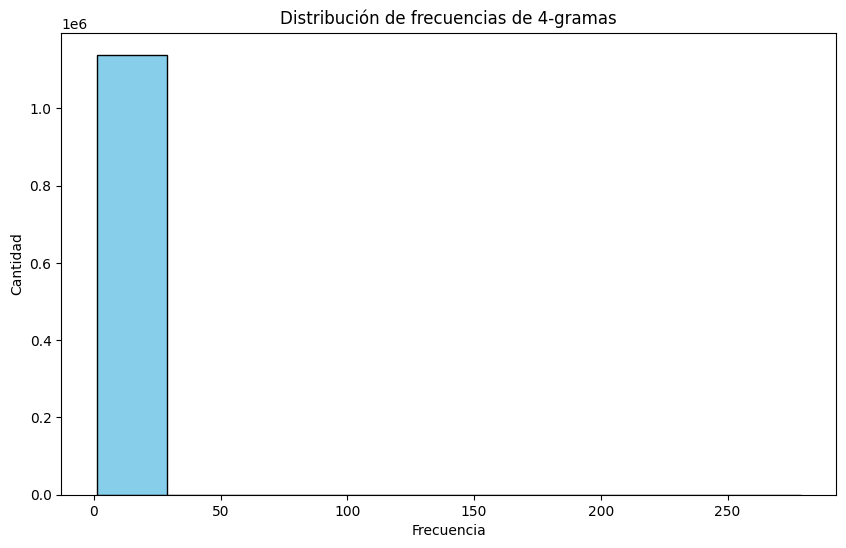

Primeros 10 5-gramas:
[('The', 'Project', 'Gutenberg', 'EBook', 'of'), ('Project', 'Gutenberg', 'EBook', 'of', 'The'), ('Gutenberg', 'EBook', 'of', 'The', 'Adventures'), ('EBook', 'of', 'The', 'Adventures', 'of'), ('of', 'The', 'Adventures', 'of', 'Sherlock'), ('The', 'Adventures', 'of', 'Sherlock', 'Holmes'), ('Adventures', 'of', 'Sherlock', 'Holmes', 'by'), ('of', 'Sherlock', 'Holmes', 'by', 'Sir'), ('Sherlock', 'Holmes', 'by', 'Sir', 'Arthur'), ('Holmes', 'by', 'Sir', 'Arthur', 'Conan')]


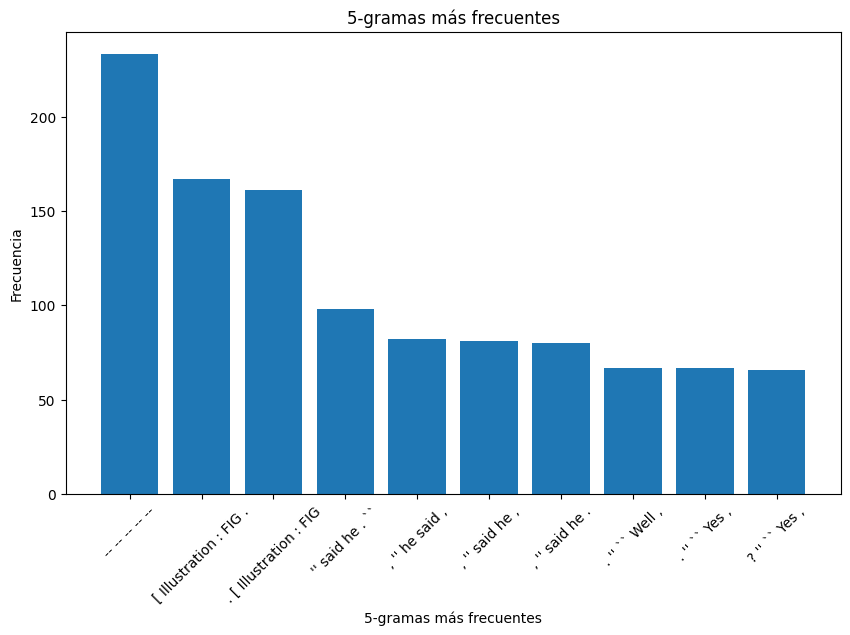

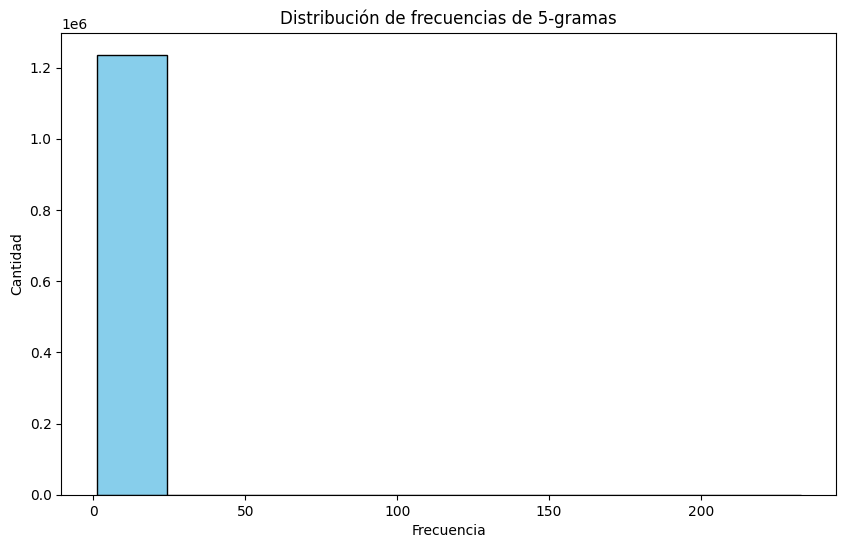

In [6]:
# Instalar y cargar las librerías necesarias
!pip install nltk pandas matplotlib

import nltk
from nltk.util import ngrams
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import requests  # Para descargar el archivo directamente

# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')

# Cargar el texto del libro desde un archivo de texto plano
url = "https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt"
response = requests.get(url)
texto_completo = response.text  # Leer el contenido como texto

# Tokenizar el texto
tokens = nltk.word_tokenize(texto_completo)

# Función para generar y visualizar n-gramas
def analizar_ngramas(tokens, n):
    # Generar los n-gramas
    ngramas = list(ngrams(tokens, n))

    # Mostrar los 10 primeros n-gramas
    print(f"Primeros 10 {n}-gramas:")
    print(ngramas[:10])

    # Calcular la frecuencia de los n-gramas
    freq_ngramas = FreqDist(ngramas)

    # Gráfica de frecuencia de los n-gramas más comunes
    ngramas_mas_frecuentes = freq_ngramas.most_common(10)
    plt.figure(figsize=(10, 6))
    plt.bar(
        [' '.join(ngrama[0]) for ngrama in ngramas_mas_frecuentes],
        [ngrama[1] for ngrama in ngramas_mas_frecuentes]
    )
    plt.xlabel(f"{n}-gramas más frecuentes")
    plt.ylabel("Frecuencia")
    plt.title(f"{n}-gramas más frecuentes")
    plt.xticks(rotation=45)
    plt.show()

    # Gráfica de distribución de frecuencias
    plt.figure(figsize=(10, 6))
    plt.hist(freq_ngramas.values(), bins=10, color='skyblue', edgecolor='black')
    plt.xlabel("Frecuencia")
    plt.ylabel("Cantidad")
    plt.title(f"Distribución de frecuencias de {n}-gramas")
    plt.show()

# Analizar n-gramas de longitud 2
analizar_ngramas(tokens, 2)

# Analizar n-gramas de longitud 3
analizar_ngramas(tokens, 3)

# Tarea adicional: Cambiar la longitud de los n-gramas a 4 o 5
# Puedes llamar a la función con otras longitudes:
analizar_ngramas(tokens, 4)
analizar_ngramas(tokens, 5)
